## Soccer Analysis and Modelling



We have tried to analyze soccer data and model a win/loss prediction model based on the assumption parameters that would yield a better prediction

Team members:
- Dharmil Shah
- Srikanth Chilaka
- Vishal Raj
- Yuvaraj Dalavai

<img src="./soccer_analytics.jpg" alt="Soccer analytics" />


In [1]:
# import required libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

import zipfile
%matplotlib inline 
import numpy as np 
import scipy as sp 
import pandas as pd 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")


After importing the required packages, we load the dataset to analyze

In [2]:
df = pd.read_csv('./soccerData.csv')


Below is the Pandas dataframe to peek into the kind of data that we would be dealing with

In [3]:
df

,date,match_id,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_half_time_goal_count,away_team_half_time_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_fouls,away_team_fouls,home_team_corner_count,away_team_corner_count,home_team_yellow,away_team_yellow,home_team_red,away_team_red
0,19/08/2000,213456,Charlton,Man City,4,0,2,0,17,8,14,4,13,12,6,6,1,2,0,0
1,19/08/2000,213457,Chelsea,West Ham,4,2,1,0,17,12,10,5,19,14,7,7,1,2,0,0
2,19/08/2000,213458,Coventry,Middlesbrough,1,3,1,1,6,16,3,9,15,21,8,4,5,3,1,0
3,19/08/2000,213459,Derby,Southampton,2,2,1,2,6,13,4,6,11,13,5,8,1,1,0,0
4,19/08/2000,213460,Leeds,Everton,2,0,2,0,17,12,8,6,21,20,6,4,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,4/11/2023,222301,Sheff Utd,Wolves,2,1,0,0,11,10,2,3,13,10,4,4,2,3,0,0
8846,4/11/2023,222302,Newcastle,Arsenal,1,0,0,0,9,14,2,1,14,9,0,11,5,1,0,0
8847,5/11/2023,222303,Nottm Forest,Aston Villa,2,0,1,0,5,13,3,3,6,9,0,10,1,1,0,0
8848,5/11/2023,222304,Luton,Liverpool,1,1,0,0,8,24,5,6,7,13,4,7,1,1,0,0


We convert the type of the date column to datetime in pandas because we use it to sort our data later to find features

In [4]:
df['date']= pd.to_datetime(df['date'])

Here, we explore all features and then decide which data to discard. The features we would be targeting are:

- Goal counts
- Half Time Goal Counts
- Corners
- Total shots
- Shots on target
- Fouls
- Yellow Cards
- Red Cards

In [5]:
raw_match_stats = df[[
                'date',
                'match_id',
                'home_team_name',
                'away_team_name',
                'home_team_goal_count', 
                'away_team_goal_count',
                'home_team_half_time_goal_count',
                'away_team_half_time_goal_count',
                'home_team_shots',
                'away_team_shots',
                'home_team_shots_on_target',
                'away_team_shots_on_target',
                'home_team_fouls',
                'away_team_fouls',
                'home_team_corner_count',
                'away_team_corner_count',
                'home_team_yellow',
                'away_team_yellow',
                'home_team_red',
                'away_team_red'
                ]]

# print(raw_match_stats)



## Data cleansing

As a cleaning step, we order our data by date (which is why we converted our column type to datetime in pandas earlier) and drop rows with NA values.

In [6]:
raw_match_stats = raw_match_stats.sort_values(by=['date'], ascending=False)
raw_match_stats = raw_match_stats.dropna()

In [7]:
raw_match_stats

,date,match_id,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_half_time_goal_count,away_team_half_time_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_fouls,away_team_fouls,home_team_corner_count,away_team_corner_count,home_team_yellow,away_team_yellow,home_team_red,away_team_red
8746,2023-12-08,222202,Newcastle,Aston Villa,5,1,2,1,17,16,13,6,12,17,6,5,4,4,0,0
8741,2023-12-08,222197,Arsenal,Nottm Forest,2,1,2,0,15,6,7,2,12,12,8,3,2,2,0,0
8742,2023-12-08,222198,Bournemouth,West Ham,1,1,0,0,14,16,5,3,9,14,10,4,1,4,0,0
8743,2023-12-08,222199,Brighton,Luton,4,1,1,0,27,9,12,3,11,12,6,7,2,2,0,0
8744,2023-12-08,222200,Everton,Fulham,0,1,0,0,19,9,9,2,12,6,10,4,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2000-02-12,213607,Bradford,Coventry,2,1,0,0,10,13,6,7,11,12,9,8,3,2,0,0
149,2000-02-12,213605,Arsenal,Southampton,1,0,0,0,24,7,12,5,14,15,16,8,0,2,0,0
78,2000-01-10,213534,Sunderland,Leicester,0,0,0,0,11,8,5,2,12,8,6,2,3,1,0,0
77,2000-01-10,213533,Chelsea,Liverpool,3,0,2,0,11,10,5,2,14,14,3,1,1,1,0,0


## Raw dataset
Above is the raw dataset which is structured so that each match has an individual row and stats for both teams are on that row with columns titles "home" and "away".

Our goal is to build a model that can predict the result of a soccer match. Given that we have some match stats, we will aim to use that information to predict a WIN, LOSS or DRAW.

### Data cleaning and feature engineering
Our Target variable is the Match Result

Therefore, our model aims to predict the result of a match. Currently, our dataset has no columns showing the match result. We will create two columns for the results for each team. One of these would become the target variable (which is the result we are looking to predict) for our  model.

We correspond numeric values to different meanings i.e. (3 = win, 1 = Draw, 0 = Loss)

In [8]:
# create results columns for both home and away teams (3 - win, 1 = Draw, 0 = Loss).

raw_match_stats.loc[raw_match_stats['home_team_goal_count'] == raw_match_stats['away_team_goal_count'], 'home_team_result'] = 1
raw_match_stats.loc[raw_match_stats['home_team_goal_count'] > raw_match_stats['away_team_goal_count'], 'home_team_result'] = 3
raw_match_stats.loc[raw_match_stats['home_team_goal_count'] < raw_match_stats['away_team_goal_count'], 'home_team_result'] = 0

raw_match_stats.loc[raw_match_stats['home_team_goal_count'] == raw_match_stats['away_team_goal_count'], 'away_team_result'] = 1
raw_match_stats.loc[raw_match_stats['home_team_goal_count'] > raw_match_stats['away_team_goal_count'], 'away_team_result'] = 0
raw_match_stats.loc[raw_match_stats['home_team_goal_count'] < raw_match_stats['away_team_goal_count'], 'away_team_result'] = 3

In [9]:
raw_match_stats

,date,match_id,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_half_time_goal_count,away_team_half_time_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_fouls,away_team_fouls,home_team_corner_count,away_team_corner_count,home_team_yellow,away_team_yellow,home_team_red,away_team_red,home_team_result,away_team_result
8746,2023-12-08,222202,Newcastle,Aston Villa,5,1,2,1,17,16,13,6,12,17,6,5,4,4,0,0,3.0,0.0
8741,2023-12-08,222197,Arsenal,Nottm Forest,2,1,2,0,15,6,7,2,12,12,8,3,2,2,0,0,3.0,0.0
8742,2023-12-08,222198,Bournemouth,West Ham,1,1,0,0,14,16,5,3,9,14,10,4,1,4,0,0,1.0,1.0
8743,2023-12-08,222199,Brighton,Luton,4,1,1,0,27,9,12,3,11,12,6,7,2,2,0,0,3.0,0.0
8744,2023-12-08,222200,Everton,Fulham,0,1,0,0,19,9,9,2,12,6,10,4,0,2,0,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2000-02-12,213607,Bradford,Coventry,2,1,0,0,10,13,6,7,11,12,9,8,3,2,0,0,3.0,0.0
149,2000-02-12,213605,Arsenal,Southampton,1,0,0,0,24,7,12,5,14,15,16,8,0,2,0,0,3.0,0.0
78,2000-01-10,213534,Sunderland,Leicester,0,0,0,0,11,8,5,2,12,8,6,2,3,1,0,0,1.0,1.0
77,2000-01-10,213533,Chelsea,Liverpool,3,0,2,0,11,10,5,2,14,14,3,1,1,1,0,0,3.0,0.0


## Average pre-match stats - Ten match average

Great! Now we have a dataset with many rows of data, with each row representing match stats and the match result (this would become our target variable).

But our goal is to build a model that predicts the match result prior to the start of a match. Are the stats from that match what we need to build this model? Maybe! Maybe not! 

When predicting a match outcome BEFORE the start of the match, we are forced to rely on match stats available to us from previous matches. 

Therefore, we need a dataset with the match result (target variable) and stats for each team heading into that match. Here, our plan is to look at the average stats for each team in the ten matches preceding each match.



We try to split the raw_match_stats to two datasets (home_team_stats and away_team_stats).

Then, we Stack these two datasets so that each row is the stats for a team for one match (team_stats_per_match).

At each row of this dataset, we get the team name, find the stats for that team during the last 10 matches, and average these stats (avg_stats_per_team).

Going forward, we add these stats to the team_stats_per_match dataset.



In [10]:
# Split the raw_match_stats to two datasets (home_team_stats and away_team_stats)

home_team_stats = raw_match_stats[[
 'date',
 'match_id',
 'home_team_name',
 'home_team_goal_count',
 'home_team_half_time_goal_count',
 'home_team_corner_count',
 'home_team_shots',
 'home_team_shots_on_target',
 'home_team_fouls',
 'home_team_yellow',
 'home_team_red',
 'home_team_result',
 'away_team_goal_count',
 'away_team_half_time_goal_count',
 'away_team_corner_count',
 'away_team_shots',
 'away_team_shots_on_target',
 'away_team_fouls',
 'away_team_yellow',
 'away_team_red']]

home_team_stats = home_team_stats.rename(columns={'home_team_name':'name',
                                                'home_team_goal_count':'goalsScored',
                                                'home_team_half_time_goal_count':'halfTimeGoalsScored',
                                                'home_team_corner_count':'cornerCount',
                                                'home_team_shots':'shots',
                                                'home_team_shots_on_target':'shotsOnTarget',
                                                'home_team_fouls':'foulsConceded',
                                                'home_team_yellow':'yellowConceded',
                                                'home_team_red':'redConceded',
                                                'home_team_result':'result',
                                                'away_team_goal_count':'goalsConceded',
                                                'away_team_half_time_goal_count':'halfTimeGoalsConceded',
                                                'away_team_corner_count':'cornersConceded',
                                                'away_team_shots':'shotsConceded',
                                                'away_team_shots_on_target':'shotsOnTargetConceded',
                                                'away_team_fouls':'foulsReceived',
                                                'away_team_yellow':'yellowOpponent',
                                                'away_team_red':'redOpponent'})

away_team_stats = raw_match_stats[[
 'date',
 'match_id',
 'away_team_name',
 'away_team_goal_count',
 'away_team_half_time_goal_count',
 'away_team_corner_count',
 'away_team_shots',
 'away_team_shots_on_target',
 'away_team_fouls',
 'away_team_yellow',
 'away_team_red',
 'away_team_result',
 'home_team_goal_count',
 'home_team_half_time_goal_count',
 'home_team_corner_count',
 'home_team_shots',
 'home_team_shots_on_target',
 'home_team_fouls',
 'home_team_yellow',
 'home_team_red',]]

away_team_stats = away_team_stats.rename(columns={'away_team_name':'name',
                                                'away_team_goal_count':'goalsScored',
                                                'away_team_half_time_goal_count':'halfTimeGoalsScored',
                                                'away_team_corner_count':'cornerCount',
                                                'away_team_shots':'shots',
                                                'away_team_shots_on_target':'shotsOnTarget',
                                                'away_team_fouls':'foulsConceded',
                                                'away_team_yellow':'yellowConceded',
                                                'away_team_red':'redConceded',
                                                'away_team_result':'result',
                                                'home_team_goal_count':'goalsConceded',
                                                'home_team_half_time_goal_count':'halfTimeGoalsConceded',
                                                'home_team_corner_count':'cornersConceded',
                                                'home_team_shots':'shotsConceded',
                                                'home_team_shots_on_target':'shotsOnTargetConceded',
                                                'home_team_fouls':'foulsReceived',
                                                'home_team_yellow':'yellowOpponent',
                                                'home_team_red':'redOpponent'})

# add an additional column to denote whether the team is playing at home or away - this will help us later
home_team_stats['home_or_away']='Home'
away_team_stats['home_or_away']='Away'

# stack these two datasets so that each row is the stats for a team for one match (team_stats_per_match)
team_stats_per_match = pd.concat([home_team_stats,away_team_stats])


## EDA 

We also need to do a little bit of analysis using our previous data to ensure if we have any correlations that we could use for our prediction model. 

One of them is the obvious one, does playing at the home ground give the team an advantage? 

It seems like it should (because its the practice ground, there is crowd support, etc)

Hence, we plot the wins for the all the matches when they were home wins and when they were away wins and voila! we see that yes, home teams tend to win more matches than away teams. (Sadly, it didn't hold true for the IND-AUS cricket wc final 2023)

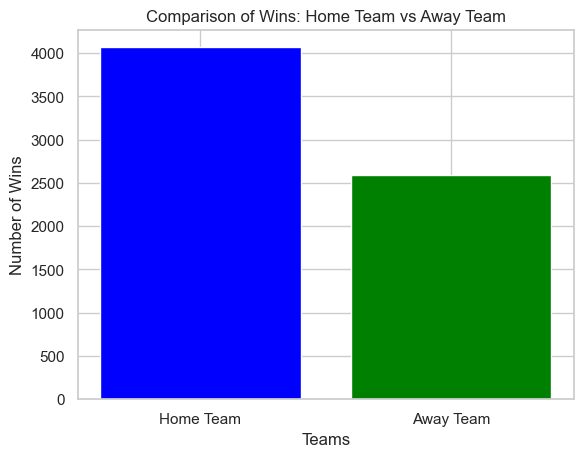

In [11]:
# Extracting columns related to match results for both home and away teams
home_wins = home_team_stats[home_team_stats['result'] == 3]
away_wins = away_team_stats[away_team_stats['result'] == 3]

# Counting the number of wins for home and away teams separately
num_home_wins = len(home_wins)
num_away_wins = len(away_wins)

# Creating a bar plot
teams = ['Home Team', 'Away Team']
wins = [num_home_wins, num_away_wins]

plt.bar(teams, wins, color=['blue', 'green'])
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Comparison of Wins: Home Team vs Away Team')
plt.show()


In [12]:
events = pd.read_csv("./input/events.csv")
game_info=pd.read_csv("./input/ginf.csv")

In [13]:
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [14]:
team_stats_per_match.columns

Index(['date', 'match_id', 'name', 'goalsScored', 'halfTimeGoalsScored', 'cornerCount', 'shots', 'shotsOnTarget', 'foulsConceded', 'yellowConceded', 'redConceded', 'result', 'goalsConceded', 'halfTimeGoalsConceded', 'cornersConceded', 'shotsConceded', 'shotsOnTargetConceded', 'foulsReceived', 'yellowOpponent', 'redOpponent', 'home_or_away'], dtype='object')

In [15]:
events.head()


,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,mladen petric,gokhan tore,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,dennis diekmeier,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,heiko westermann,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,NaN,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


---


Understanding the representation of interger coded variables

The following would show the events related to each integer coded variable in the dataset.

In [16]:
encoding = pd.read_table('dictionary.txt', delim_whitespace=False, names=('num','events'))
event_type=encoding[1:13]
event_type_2=encoding[14:18]
side=encoding[19:21]
shot_place=encoding[22:35]
shot_outcome=encoding[36:40]
location=encoding[41:60]
bodypart=encoding[61:64]
assist_method=encoding[65:70]
situation=encoding[71:75]

In [17]:
encoding

,num,events
0,event_type,NaN
1,0,Announcement
2,1,Attempt
3,2,Corner
4,3,Foul
...,...,...
70,situation,NaN
71,1,Open play
72,2,Set piece
73,3,Corner


In [18]:
event_type

,num,events
1,0,Announcement
2,1,Attempt
3,2,Corner
4,3,Foul
5,4,Yellow card
6,5,Second yellow card
7,6,Red card
8,7,Substitution
9,8,Free kick won
10,9,Offside


In [19]:
event_type_2

,num,events
14,12,Key Pass
15,13,Failed through ball
16,14,Sending off
17,15,Own goal


In [20]:
side

,num,events
19,1,Home
20,2,Away


In [21]:
shot_place

,num,events
22,1,Bit too high
23,2,Blocked
24,3,Bottom left corner
25,4,Bottom right corner
26,5,Centre of the goal
27,6,High and wide
28,7,Hits the bar
29,8,Misses to the left
30,9,Misses to the right
31,10,Too high


In [22]:
shot_outcome

,num,events
36,1,On target
37,2,Off target
38,3,Blocked
39,4,Hit the bar


In [23]:
location

,num,events
41,1,Attacking half
42,2,Defensive half
43,3,Centre of the box
44,4,Left wing
45,5,Right wing
46,6,Difficult angle and long range
47,7,Difficult angle on the left
48,8,Difficult angle on the right
49,9,Left side of the box
50,10,Left side of the six yard box


In [24]:
assist_method

,num,events
65,0,None
66,1,Pass
67,2,Cross
68,3,Headed pass
69,4,Through ball


In [25]:
bodypart

,num,events
61,1,right foot
62,2,left foot
63,3,head


In [26]:
situation

,num,events
71,1,Open play
72,2,Set piece
73,3,Corner
74,4,Free kick


## With the above data, we will try to analyze goals

First we filter out all goal events from our dataset

In [27]:
goals=events[events["is_goal"]==1]
goals

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,mario gotze,robert lewandowski,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,NaN,NaN,NaN,4.0,1.0,1,13.0,1.0,0,3.0,0
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,robert tesche,NaN,NaN,NaN,3.0,1.0,1,3.0,2.0,0,3.0,0
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,papiss demba cisse,felix bastians,NaN,NaN,3.0,1.0,1,15.0,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940713,xY7uZwOI/,xY7uZwOI26,26,24,"Goal! Monaco 1, Lorient 0. Boschilia (Monaco)...",1,NaN,1,AS Monaco,Lorient,boschilia,NaN,NaN,NaN,5.0,1.0,1,3.0,2.0,0,1.0,0
940716,xY7uZwOI/,xY7uZwOI29,29,28,"Goal! Monaco 2, Lorient 0. Boschilia (Monaco)...",1,12.0,1,AS Monaco,Lorient,boschilia,bernardo silva,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
940722,xY7uZwOI/,xY7uZwOI35,35,37,"Goal! Monaco 3, Lorient 0. Valere Germain (Mo...",1,NaN,1,AS Monaco,Lorient,valere germain,NaN,NaN,NaN,4.0,1.0,1,9.0,1.0,0,1.0,0
940742,xY7uZwOI/,xY7uZwOI58,58,59,"Goal! Monaco 4, Lorient 0. Valere Germain (Mo...",1,12.0,1,AS Monaco,Lorient,valere germain,djibril sidibe,NaN,NaN,5.0,1.0,1,11.0,1.0,1,1.0,0


Now, the probability distribution of goal scoring might not be a uniform distribution. Based on how soccer is played, it could be that the chances of scoring a goal in the first minute might be less probable than scoring a goal at, say 15 minute mark, or 25 minute, or 45th minute. 

We need to verify that. Hence, we try to plot the goals scored at every minute of the game

Text(0.5, 1.0, 'Number of goals against Time during match')

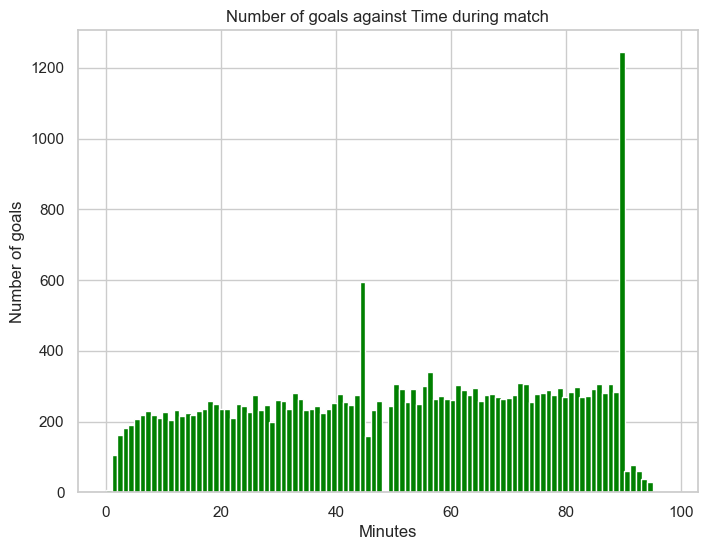

In [28]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals.time,width=1,bins=100,color="green")   #100 so 1 bar per minute
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.title("Number of goals against Time during match")

Just to be sure, We try to check if this is the common pattern for every team or diffeent teams behave differently

In [29]:
## The different teams in the dataset
team_names = events['event_team'].unique()
len(team_names)

142

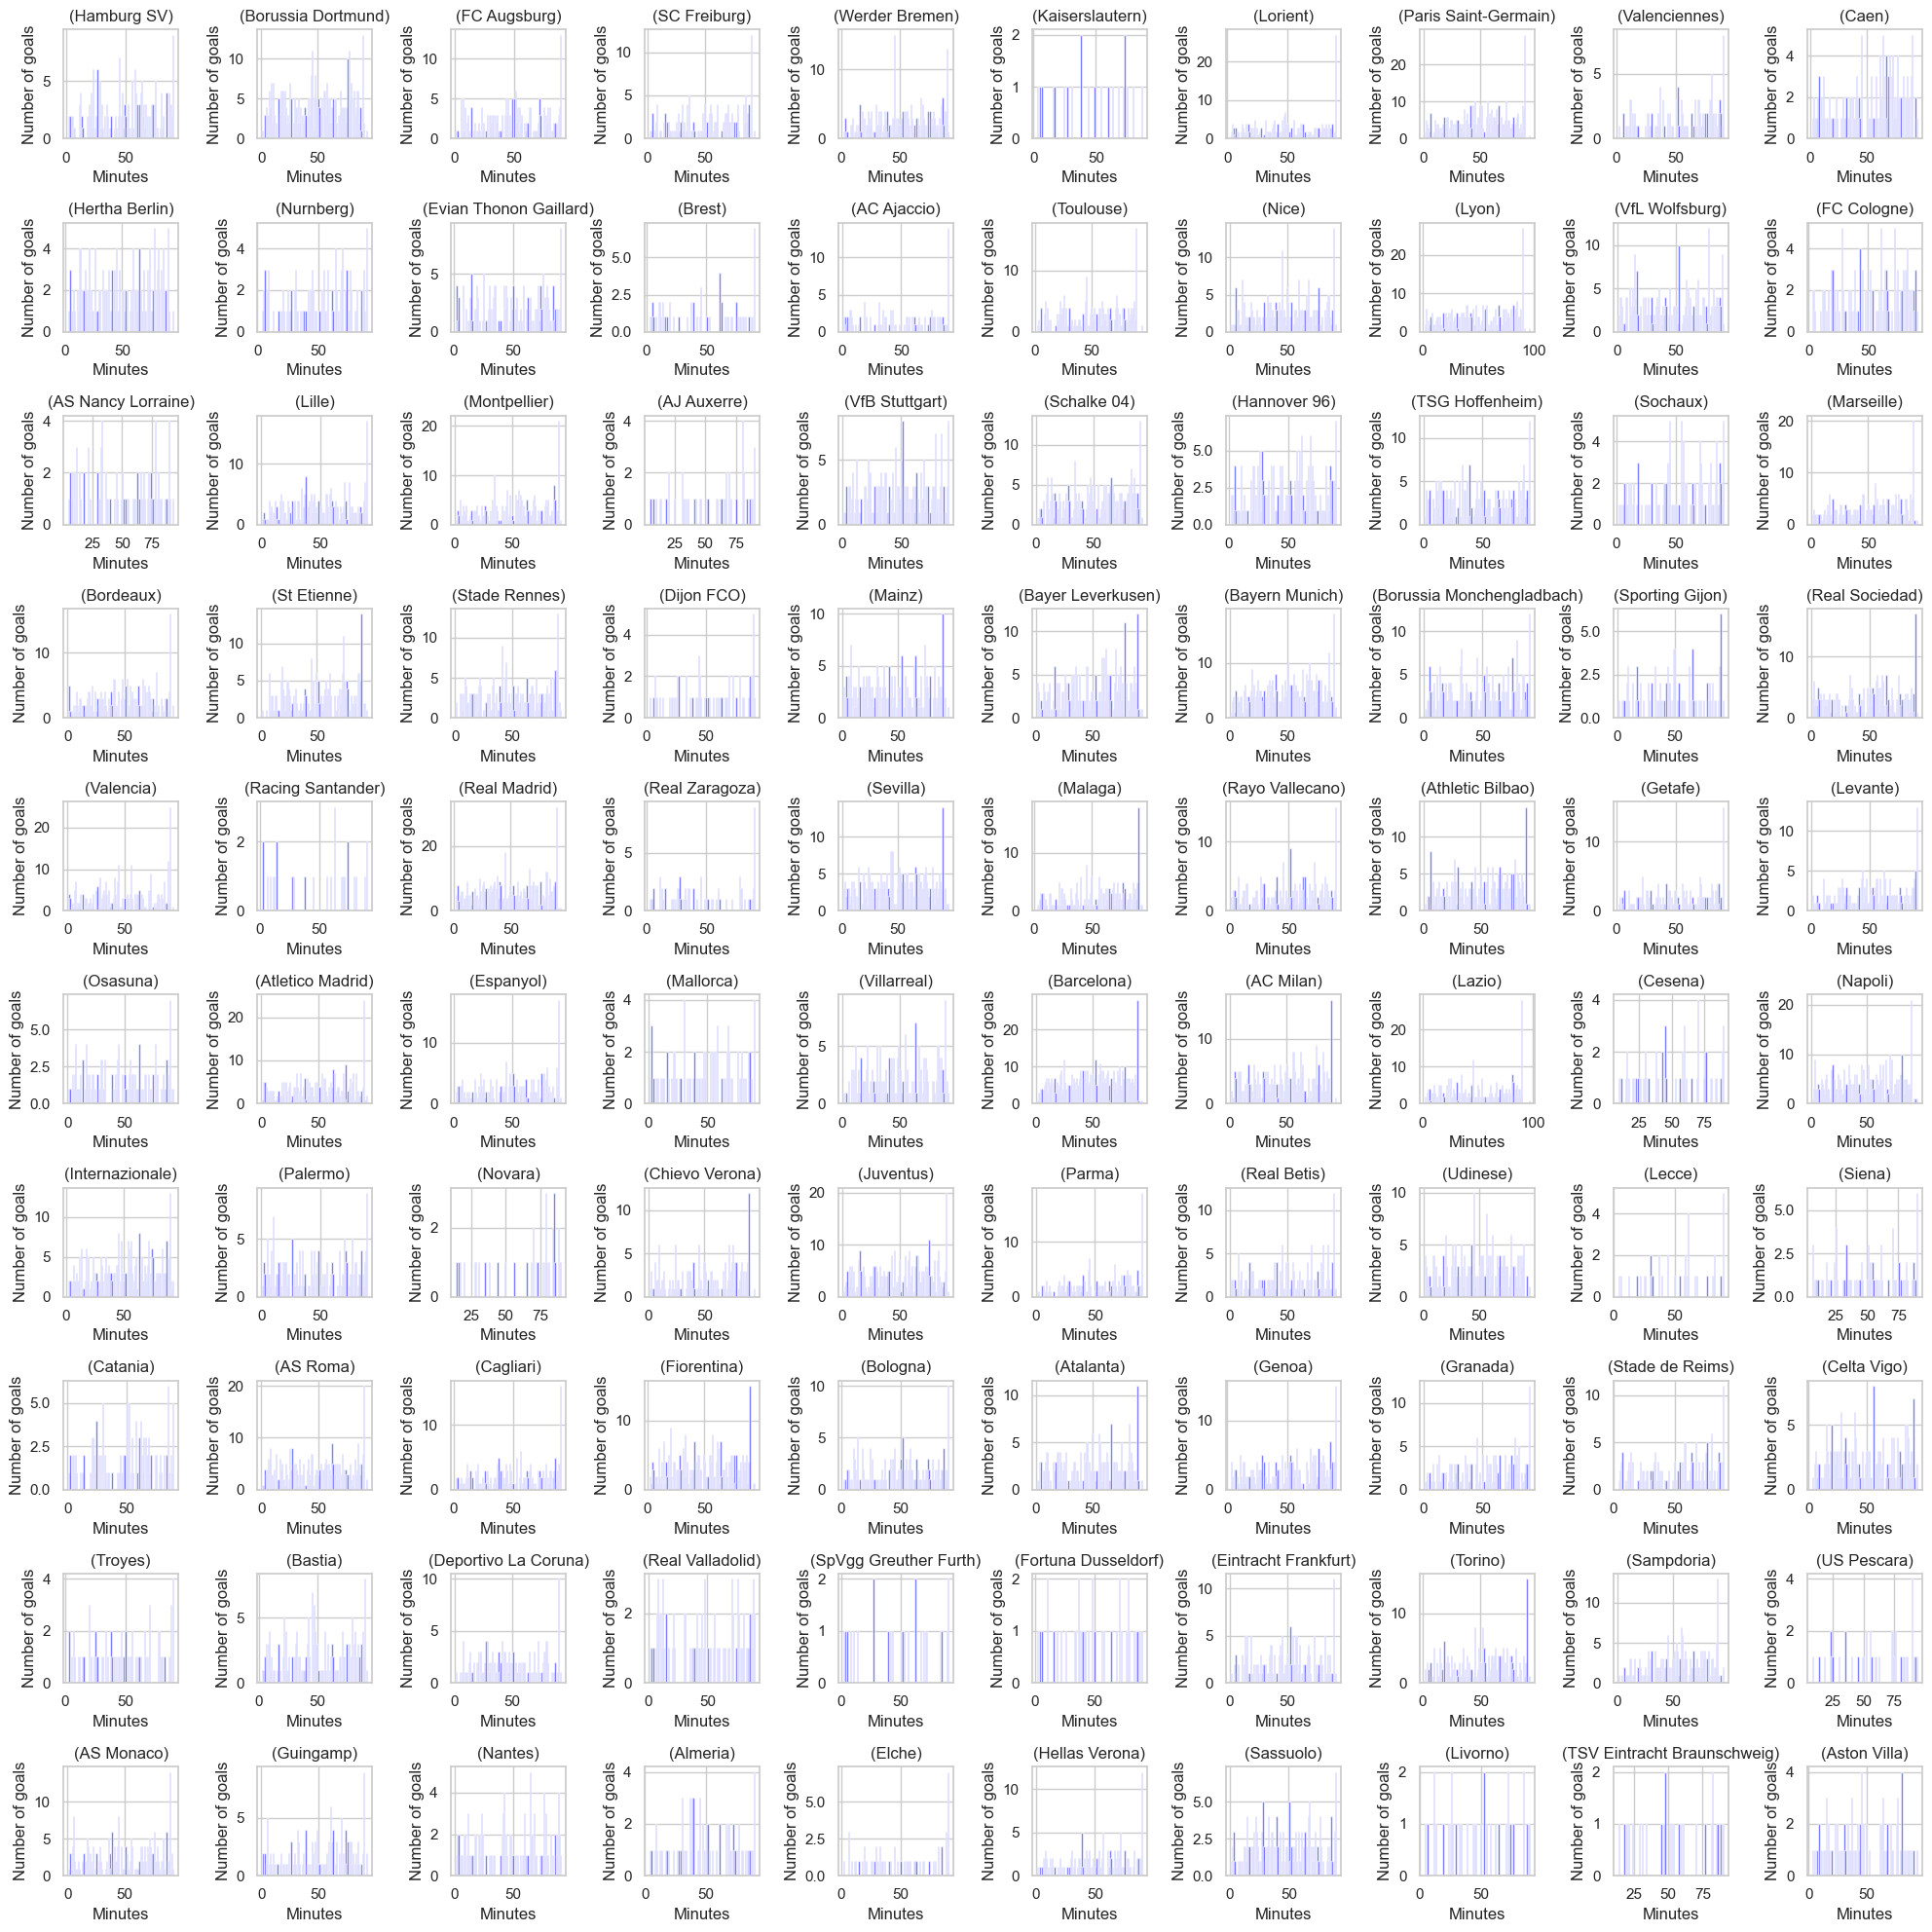

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt

# def plot_goals_per_minute(events, team_name):
#     team_goals = events[(events["is_goal"] == 1) & (events["event_team"] == team_name)]
    
#     fig, ax = plt.subplots(figsize=(8, 6))
#     ax.hist(team_goals['time'], width=1, bins=100, color="blue", alpha=0.7)
#     ax.set_xlabel("Minutes")
#     ax.set_ylabel("Number of goals")
#     ax.set_title(f"Number of goals against Time during match ({team_name})")
    
#     plt.show()


# for team in team_names:
#     plot_goals_per_minute(events, team)
import pandas as pd
import matplotlib.pyplot as plt

def plot_goals_per_minute(events, team_name, ax):
    team_goals = events[(events["is_goal"] == 1) & (events["event_team"] == team_name)]
    
    ax.hist(team_goals['time'], width=1, bins=100, color="blue", alpha=0.7)
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Number of goals")
    ax.set_title(f"({team_name})")

# Assuming 'events' is your DataFrame containing the match events data
team_names = events['event_team'].unique()

fig, axs = plt.subplots(10, 10, figsize=(20, 20))

for i in range(10):
    for j in range(10):
        index = i * 10 + j
        if index < len(team_names):
            plot_goals_per_minute(events, team_names[index], axs[i, j])
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()


As we predicted, the plot above shows:

- Most goals are scored around the Half-Time (45mins + extra time) and around Full-Time (90mins + extra time). 
- Other than that, the chances of a goal in the starting minutes and after 90 minutes (extra time) is generally lower
- Some teams do not follow the trend, but majority of the teams do follow the 45 and 90th minute most goals trend. 

## Then we check if teams score more goals in a home game than an away game

Text(0.5, 1.0, 'Number of goals (by home/away side) against Time during match')

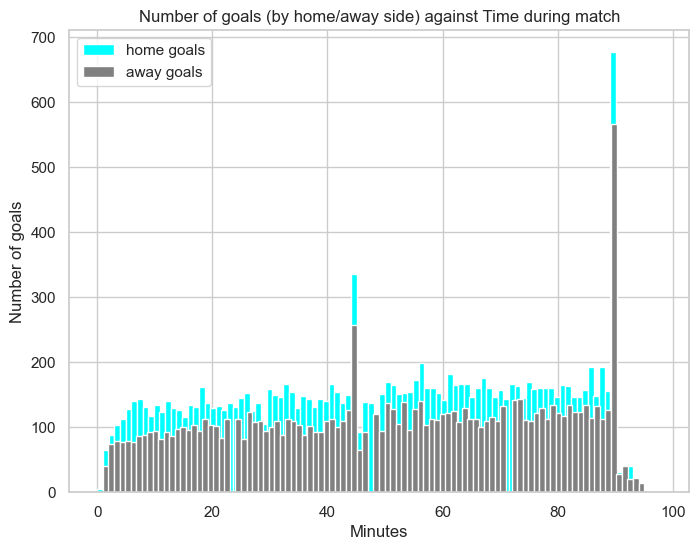

In [31]:
fig=plt.figure(figsize=(8,6))
plt.hist(goals[goals["side"]==1]["time"],width=1,bins=100,color="cyan",label="home goals")   
plt.hist(goals[goals["side"]==2]["time"],width=1,bins=100,color="grey",label="away goals") 
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by home/away side) against Time during match")

The plot of overall and team wise goals scored based on home and away matches above shows:

For every minute, most of the goals scored are by the home side
This supports the general notion that the home side has a statistical advantage.

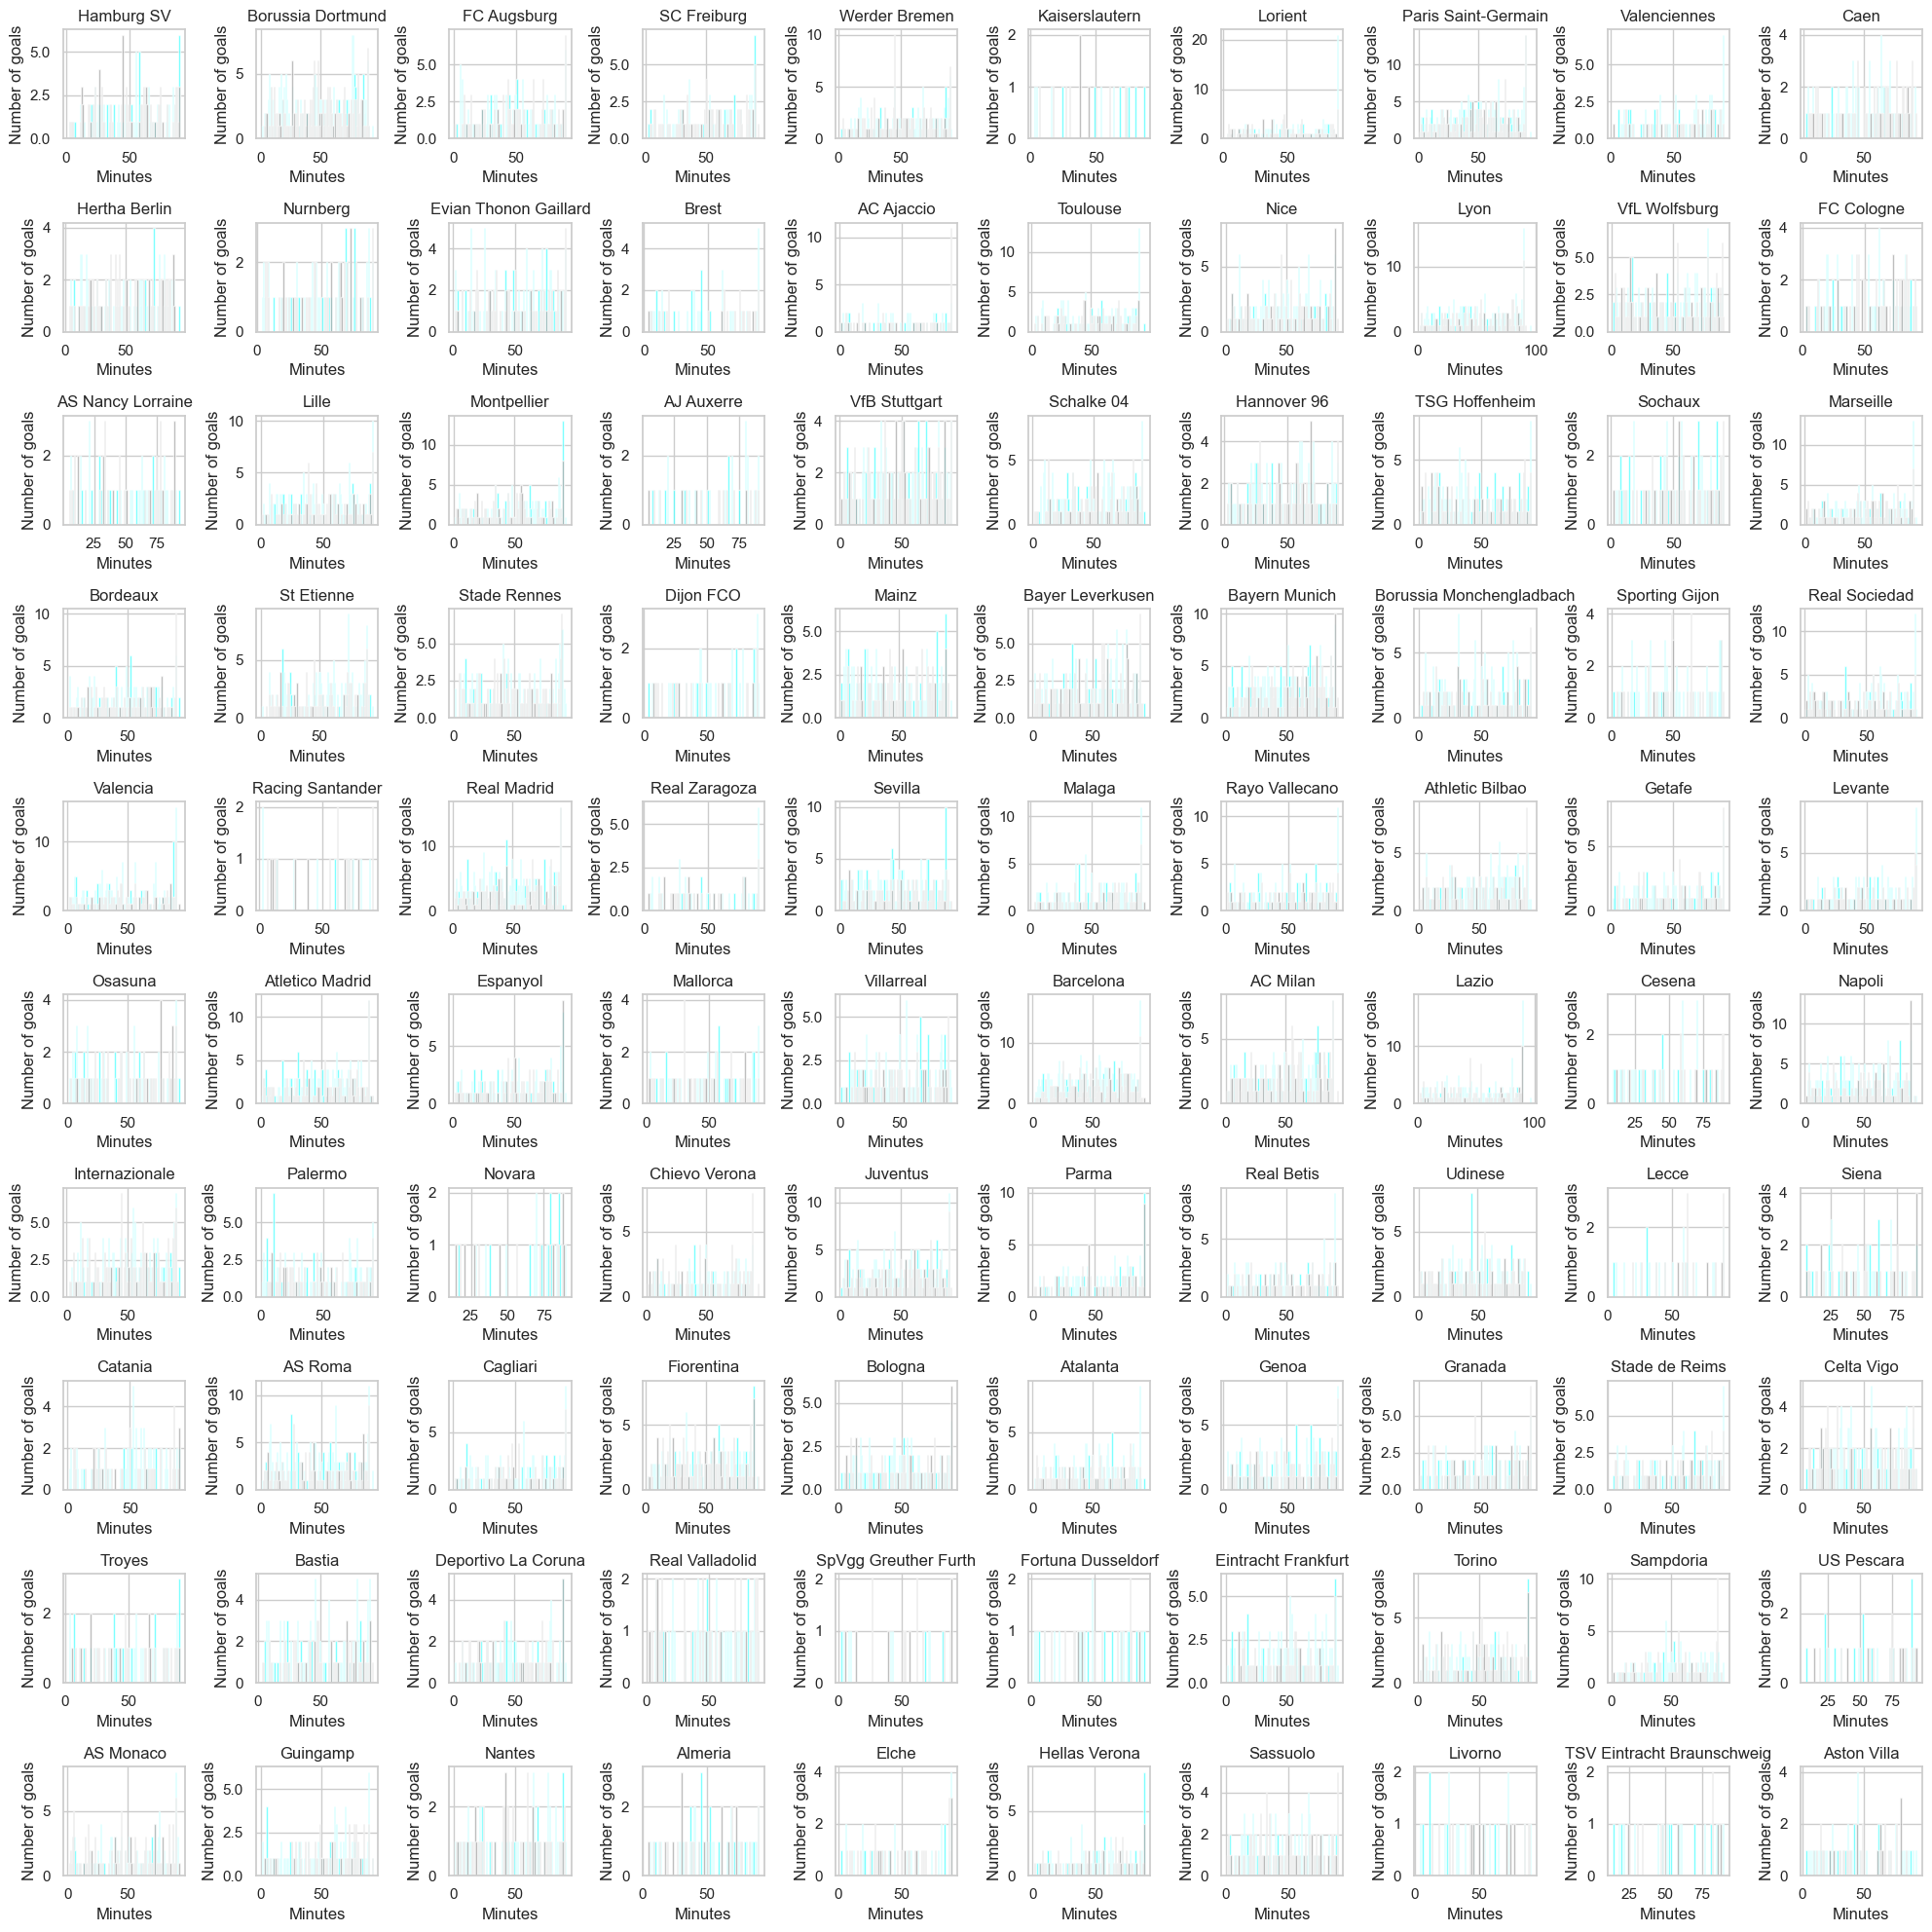

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_home_away_goals(events, team_name, ax):
    home_goals = events[(events["is_goal"] == 1) & (events["event_team"] == team_name) & (events["side"] == 1)]["time"]
    away_goals = events[(events["is_goal"] == 1) & (events["event_team"] == team_name) & (events["side"] == 2)]["time"]

    ax.hist(home_goals, width=1, bins=100, color="cyan", alpha=0.7, label="Home goals")
    ax.hist(away_goals, width=1, bins=100, color="grey", alpha=0.7, label="Away goals")
    ax.set_xlabel("Minutes")
    ax.set_ylabel("Number of goals")
    ax.set_title(f"{team_name}")
    # ax.legend()

# Assuming 'events' is your DataFrame containing the match events data
team_names = events['event_team'].unique()

fig, axs = plt.subplots(10, 10, figsize=(20, 20))

for i in range(10):
    for j in range(10):
        index = i * 10 + j
        if index < len(team_names):
            plot_home_away_goals(events, team_names[index], axs[i, j])
        else:
            axs[i, j].axis('off')  # Hide empty subplots

plt.tight_layout()
plt.show()


Going forward, for the sake of simplicity and brevity of the project, we will be assuming that team wise anomalies can be excluded from our analysis as team wise distributions ***almost*** gives us the same insight as the overall insight. As a future note, we can improve our analysis and modelling later to account for team wise characteristics as well

---


Lets look at how we can get the average stats for the previous 10 matches for each team at each match.


Why did we chose ten matches? Why not 15? Should we average over a time period (matches in the last year perhaps?) rather than a number? What's the least number of matches available for each competing team in the dataset? These are all interesting questions that may improve our model.

In [33]:
# At each row of this dataset, get the team name, find the stats for that team during the last 10 matches, and average these stats (avg_stats_per_team). 

avg_stat_columns = ['goals_per_match','corners_per_match','shots_per_match','shotsOnTarget_per_match','fouls_per_match', 'possession_per_match']
stats_list = []
for index, row in tqdm(team_stats_per_match.iterrows()):
    team_stats_last_five_matches = team_stats_per_match.loc[(team_stats_per_match['name']==row['name']) & (team_stats_per_match['date']<row['date'])].sort_values(by=['date'], ascending=False)
    # print(team_stats_last_five_matches)
    stats_list.append(team_stats_last_five_matches.iloc[0:5,:].mean(axis=0).values[0:6])

avg_stats_per_team = pd.DataFrame(stats_list, columns=avg_stat_columns)
# print(avg_stats_per_team)

17700it [00:28, 625.38it/s]


In [34]:
# At each row of this dataset, we get the team name, find the stats for that team during the last 5 matches, and average these stats (avg_stats_per_team). 

avg_lastTen_stat_columns = [
                    'average_goalsScored_last_ten',
                    'average_halfTimeGoalsScored_last_ten',
                    'average_cornerCount_last_ten',
                    'average_shots_last_ten',
                    'average_shotsOnTarget_last_ten',
                    'average_foulsConceded_last_ten',
                    'average_yellowConceded_last_ten',
                    'average_redConceded_last_ten',
                    'average_result_last_ten',
                    'average_goalsConceded_last_ten',
                    'average_halfTimeGoalsConceded_last_ten',
                    'average_cornersConceded_last_ten',
                    'average_shotsConceded_last_ten',
                    'average_shotsOnTargetConceded_last_ten',
                    'average_foulsReceived_last_ten',
                    'average_yellowOpponent_last_ten',
                    'average_redOpponent_last_ten'
                    ]

lastTen_stats_list = []
for index, row in tqdm(team_stats_per_match.iterrows()):
    team_stats_last_ten_matches = team_stats_per_match.loc[(team_stats_per_match['name']==row['name']) & (team_stats_per_match['date']<row['date'])].sort_values(by=['date'], ascending=False)
    lastTen_stats_list.append(team_stats_last_ten_matches.iloc[0:10,3:-1].mean(axis=0).values[0:18])

avg_lastTen_stats_per_team = pd.DataFrame(lastTen_stats_list, columns=avg_lastTen_stat_columns)
avg_lastTen_stats_per_team.head()

17700it [00:26, 673.46it/s]


,average_goalsScored_last_ten,average_halfTimeGoalsScored_last_ten,average_cornerCount_last_ten,average_shots_last_ten,average_shotsOnTarget_last_ten,average_foulsConceded_last_ten,average_yellowConceded_last_ten,average_redConceded_last_ten,average_result_last_ten,average_goalsConceded_last_ten,average_halfTimeGoalsConceded_last_ten,average_cornersConceded_last_ten,average_shotsConceded_last_ten,average_shotsOnTargetConceded_last_ten,average_foulsReceived_last_ten,average_yellowOpponent_last_ten,average_redOpponent_last_ten
0,2.3,1.2,5.5,14.8,6.4,11.1,2.3,0.0,1.8,0.9,0.4,4.7,10.2,3.4,11.5,2.5,0.1
1,2.3,0.9,7.6,14.7,6.2,10.0,1.4,0.1,2.0,0.9,0.4,3.1,10.6,2.7,11.1,2.2,0.1
2,0.8,0.7,4.5,11.2,4.1,12.6,1.9,0.1,1.1,1.6,0.8,6.6,15.5,6.1,11.5,2.6,0.1
3,1.9,0.6,5.8,14.3,5.5,11.8,2.1,0.0,1.3,2.0,1.0,3.3,12.5,4.5,12.6,2.7,0.2
4,1.1,0.6,3.8,12.7,3.8,10.7,1.9,0.1,1.2,1.4,0.6,7.4,16.0,4.5,10.0,1.8,0.0


Since we saw above that teams can play better at home than away so it's important to consider whether they are playing at home or away. 

In [35]:
avg_lastFiveHome_stat_columns=[
                    'average_goalsScored_last_five_home',
                    'average_halfTimeGoalsScored_last_five_home',
                    'average_cornerCount_last_five_home',
                    'average_shots_last_five_home',
                    'average_shotsOnTarget_last_five_home',
                    'average_foulsConceded_last_five_home',
                    'average_yellowConceded_last_five_home',
                    'average_redConceded_last_five_home',
                    'average_result_last_five_home',
                    'average_goalsConceded_last_five_home',
                    'average_halfTimeGoalsConceded_last_five_home',
                    'average_cornersConceded_last_five_home',
                    'average_shotsConceded_last_five_home',
                    'average_shotsOnTargetConceded_last_five_home',
                    'average_foulsReceived_last_five_home',
                    'average_yellowOpponent_last_five_home',
                    'average_redOpponent_last_five_home'
                    ]

lastFive_Home_stats_list = []
team_stats_L5_home_matches = team_stats_per_match[team_stats_per_match['home_or_away'] == 'Home']
for index, row in tqdm(team_stats_L5_home_matches.iterrows()):
    team_stats_last_five_home_matches = team_stats_L5_home_matches.loc[(team_stats_L5_home_matches['name']==row['name']) & (team_stats_L5_home_matches['date']<row['date'])].sort_values(by=['date'], ascending=False)
    lastFive_Home_stats_list.append(team_stats_last_five_home_matches.iloc[0:5,3:-1].mean(axis=0).values[0:18])

avg_lastFiveHome_stats_per_team = pd.DataFrame(lastFive_Home_stats_list, columns=avg_lastFiveHome_stat_columns)
avg_lastFiveHome_stats_per_team

8850it [00:09, 958.12it/s]


,average_goalsScored_last_five_home,average_halfTimeGoalsScored_last_five_home,average_cornerCount_last_five_home,average_shots_last_five_home,average_shotsOnTarget_last_five_home,average_foulsConceded_last_five_home,average_yellowConceded_last_five_home,average_redConceded_last_five_home,average_result_last_five_home,average_goalsConceded_last_five_home,average_halfTimeGoalsConceded_last_five_home,average_cornersConceded_last_five_home,average_shotsConceded_last_five_home,average_shotsOnTargetConceded_last_five_home,average_foulsReceived_last_five_home,average_yellowOpponent_last_five_home,average_redOpponent_last_five_home
0,2.0,1.2,6.8,16.2,6.6,9.8,1.6,0.0,2.4,0.6,0.0,5.2,10.4,3.0,11.8,3.0,0.2
1,2.2,0.4,7.4,16.0,6.8,8.8,1.0,0.0,1.8,1.0,0.4,3.2,7.2,2.2,10.6,3.0,0.2
2,1.0,0.8,5.2,8.8,3.6,10.0,1.6,0.2,1.4,1.6,0.8,7.4,14.2,6.2,10.2,2.8,0.0
3,1.6,0.6,10.2,18.6,5.8,11.4,1.2,0.0,1.0,2.4,1.4,2.6,11.6,4.2,13.4,3.2,0.0
4,1.0,0.8,4.8,16.8,5.4,11.0,1.4,0.0,1.2,0.8,0.4,6.4,11.2,3.2,12.2,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8846,1.0,1.0,3.0,7.0,5.0,18.0,2.0,0.0,3.0,0.0,0.0,11.0,13.0,4.0,17.0,3.0,0.0
8847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
team_stats_L5_home_matches = pd.concat([team_stats_L5_home_matches.reset_index(drop=True), avg_lastFiveHome_stats_per_team], axis=1, ignore_index=False)
team_stats_L5_home_matches

,date,match_id,name,goalsScored,halfTimeGoalsScored,cornerCount,shots,shotsOnTarget,foulsConceded,yellowConceded,redConceded,result,goalsConceded,halfTimeGoalsConceded,cornersConceded,shotsConceded,shotsOnTargetConceded,foulsReceived,yellowOpponent,redOpponent,home_or_away,average_goalsScored_last_five_home,average_halfTimeGoalsScored_last_five_home,average_cornerCount_last_five_home,average_shots_last_five_home,average_shotsOnTarget_last_five_home,average_foulsConceded_last_five_home,average_yellowConceded_last_five_home,average_redConceded_last_five_home,average_result_last_five_home,average_goalsConceded_last_five_home,average_halfTimeGoalsConceded_last_five_home,average_cornersConceded_last_five_home,average_shotsConceded_last_five_home,average_shotsOnTargetConceded_last_five_home,average_foulsReceived_last_five_home,average_yellowOpponent_last_five_home,average_redOpponent_last_five_home
0,2023-12-08,222202,Newcastle,5,2,6,17,13,12,4,0,3.0,1,1,5,16,6,17,4,0,Home,2.0,1.2,6.8,16.2,6.6,9.8,1.6,0.0,2.4,0.6,0.0,5.2,10.4,3.0,11.8,3.0,0.2
1,2023-12-08,222197,Arsenal,2,2,8,15,7,12,2,0,3.0,1,0,3,6,2,12,2,0,Home,2.2,0.4,7.4,16.0,6.8,8.8,1.0,0.0,1.8,1.0,0.4,3.2,7.2,2.2,10.6,3.0,0.2
2,2023-12-08,222198,Bournemouth,1,0,10,14,5,9,1,0,1.0,1,0,4,16,3,14,4,0,Home,1.0,0.8,5.2,8.8,3.6,10.0,1.6,0.2,1.4,1.6,0.8,7.4,14.2,6.2,10.2,2.8,0.0
3,2023-12-08,222199,Brighton,4,1,6,27,12,11,2,0,3.0,1,0,7,9,3,12,2,0,Home,1.6,0.6,10.2,18.6,5.8,11.4,1.2,0.0,1.0,2.4,1.4,2.6,11.6,4.2,13.4,3.2,0.0
4,2023-12-08,222200,Everton,0,0,10,19,9,12,0,0,0.0,1,0,4,9,2,6,2,0,Home,1.0,0.8,4.8,16.8,5.4,11.0,1.4,0.0,1.2,0.8,0.4,6.4,11.2,3.2,12.2,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,2000-02-12,213607,Bradford,2,0,9,10,6,11,3,0,3.0,1,0,8,13,7,12,2,0,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8846,2000-02-12,213605,Arsenal,1,0,16,24,12,14,0,0,3.0,0,0,8,7,5,15,2,0,Home,1.0,1.0,3.0,7.0,5.0,18.0,2.0,0.0,3.0,0.0,0.0,11.0,13.0,4.0,17.0,3.0,0.0
8847,2000-01-10,213534,Sunderland,0,0,6,11,5,12,3,0,1.0,0,0,2,8,2,8,1,0,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8848,2000-01-10,213533,Chelsea,3,2,3,11,5,14,1,0,3.0,0,0,1,10,2,14,1,0,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
avg_lastFiveAway_stat_columns=[
                    'average_goalsScored_last_five_away',
                    'average_halfTimeGoalsScored_last_five_away',
                    'average_cornerCount_last_five_away',
                    'average_shots_last_five_away',
                    'average_shotsOnTarget_last_five_away',
                    'average_foulsConceded_last_five_away',
                    'average_yellowConceded_last_five_away',
                    'average_redConceded_last_five_away',
                    'average_result_last_five_away',
                    'average_goalsConceded_last_five_away',
                    'average_halfTimeGoalsConceded_last_five_away',
                    'average_cornersConceded_last_five_away',
                    'average_shotsConceded_last_five_away',
                    'average_shotsOnTargetConceded_last_five_away',
                    'average_foulsReceived_last_five_away',
                    'average_yellowOpponent_last_five_away',
                    'average_redOpponent_last_five_away'
                    ]
lastFive_away_stats_list = []
team_stats_L5_away_matches = team_stats_per_match[team_stats_per_match['home_or_away'] == 'Away']
for index, row in tqdm(team_stats_L5_away_matches.iterrows()):
    team_stats_last_five_away_matches = team_stats_L5_away_matches.loc[(team_stats_L5_away_matches['name']==row['name']) & (team_stats_L5_away_matches['date']<row['date'])].sort_values(by=['date'], ascending=False)
    lastFive_away_stats_list.append(team_stats_last_five_away_matches.iloc[0:5,3:-1].mean(axis=0).values[0:18])

avg_lastFiveAway_stats_per_team = pd.DataFrame(lastFive_away_stats_list, columns=avg_lastFiveAway_stat_columns)
team_stats_L5_away_matches = pd.concat([team_stats_L5_away_matches.reset_index(drop=True), avg_lastFiveAway_stats_per_team], axis=1, ignore_index=False)

8850it [00:09, 924.77it/s]


In [38]:
team_stats_L5_home_matches.columns = team_stats_L5_home_matches.columns[:2].tolist() + ['team_1_'+str(col) for col in team_stats_L5_home_matches.columns[2:]]
team_stats_L5_away_matches.columns = team_stats_L5_away_matches.columns[:2].tolist() + ['team_2_'+str(col) for col in team_stats_L5_away_matches.columns[2:]]

In [39]:
home_and_away_stats = pd.merge(team_stats_L5_home_matches,team_stats_L5_away_matches,how='left',on=['date','match_id'])


## Reshape average pre-match stats

Now that we have the average stats for each team going into every match, we can create a dataset similar to the raw_match_stats, where each row represents both teams from one match.

Furthermore, we Re-segment the home and away teams (i.e. name them as Team 1 and Team 2 rather than home and away).


In [40]:
team_stats_per_match = pd.concat([team_stats_per_match.reset_index(drop=True), avg_lastTen_stats_per_team], axis=1, ignore_index=False)
# Re-segment the home and away teams.
home_team_stats = team_stats_per_match.iloc[:int(team_stats_per_match.shape[0]/2),:]
away_team_stats = team_stats_per_match.iloc[int(team_stats_per_match.shape[0]/2):,:]

home_team_stats.columns = home_team_stats.columns[:2].tolist() + ['team_1_'+str(col) for col in home_team_stats.columns[2:]]
away_team_stats.columns = away_team_stats.columns[:2].tolist() + ['team_2_'+str(col) for col in away_team_stats.columns[2:]]

# Combine at each match to get a dataset with a row representing each match. 
# drop the NA rows (earliest match for each team, i.e no previous stats)
away_team_stats = away_team_stats.iloc[:, 2:]
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)
match_stats = match_stats.dropna().reset_index(drop=True)

In [41]:
match_stats=pd.merge(match_stats,home_and_away_stats,how='left',on=['date',
                                                                    'match_id',
                                                                    'team_1_name',
                                                                    'team_1_goalsScored',
                                                                    'team_1_halfTimeGoalsScored',
                                                                    'team_1_cornerCount',
                                                                    'team_1_shots',
                                                                    'team_1_shotsOnTarget',
                                                                    'team_1_foulsConceded',
                                                                    'team_1_yellowConceded',
                                                                    'team_1_redConceded',
                                                                    'team_1_result',
                                                                    'team_1_goalsConceded',
                                                                    'team_1_halfTimeGoalsConceded',
                                                                    'team_1_cornersConceded',
                                                                    'team_1_shotsConceded',
                                                                    'team_1_shotsOnTargetConceded',
                                                                    'team_1_foulsReceived',
                                                                    'team_1_yellowOpponent',
                                                                    'team_1_redOpponent',
                                                                    'team_1_home_or_away',
                                                                    'team_2_name',
                                                                    'team_2_goalsScored',
                                                                    'team_2_halfTimeGoalsScored',
                                                                    'team_2_cornerCount',
                                                                    'team_2_shots',
                                                                    'team_2_shotsOnTarget',
                                                                    'team_2_foulsConceded',
                                                                    'team_2_yellowConceded',
                                                                    'team_2_redConceded',
                                                                    'team_2_result',
                                                                    'team_2_goalsConceded',
                                                                    'team_2_halfTimeGoalsConceded',
                                                                    'team_2_cornersConceded',
                                                                    'team_2_shotsConceded',
                                                                    'team_2_shotsOnTargetConceded',
                                                                    'team_2_foulsReceived',
                                                                    'team_2_yellowOpponent',
                                                                    'team_2_redOpponent',
                                                                    'team_2_home_or_away'])

In [42]:
match_stats.head()

,date,match_id,team_1_name,team_1_goalsScored,team_1_halfTimeGoalsScored,team_1_cornerCount,team_1_shots,team_1_shotsOnTarget,team_1_foulsConceded,team_1_yellowConceded,team_1_redConceded,team_1_result,team_1_goalsConceded,team_1_halfTimeGoalsConceded,team_1_cornersConceded,team_1_shotsConceded,team_1_shotsOnTargetConceded,team_1_foulsReceived,team_1_yellowOpponent,team_1_redOpponent,team_1_home_or_away,team_1_average_goalsScored_last_ten,team_1_average_halfTimeGoalsScored_last_ten,team_1_average_cornerCount_last_ten,team_1_average_shots_last_ten,team_1_average_shotsOnTarget_last_ten,team_1_average_foulsConceded_last_ten,team_1_average_yellowConceded_last_ten,team_1_average_redConceded_last_ten,team_1_average_result_last_ten,team_1_average_goalsConceded_last_ten,team_1_average_halfTimeGoalsConceded_last_ten,team_1_average_cornersConceded_last_ten,team_1_average_shotsConceded_last_ten,team_1_average_shotsOnTargetConceded_last_ten,team_1_average_foulsReceived_last_ten,team_1_average_yellowOpponent_last_ten,team_1_average_redOpponent_last_ten,team_2_name,team_2_goalsScored,team_2_halfTimeGoalsScored,team_2_cornerCount,team_2_shots,team_2_shotsOnTarget,team_2_foulsConceded,team_2_yellowConceded,team_2_redConceded,team_2_result,team_2_goalsConceded,team_2_halfTimeGoalsConceded,...,team_2_average_halfTimeGoalsScored_last_ten,team_2_average_cornerCount_last_ten,team_2_average_shots_last_ten,team_2_average_shotsOnTarget_last_ten,team_2_average_foulsConceded_last_ten,team_2_average_yellowConceded_last_ten,team_2_average_redConceded_last_ten,team_2_average_result_last_ten,team_2_average_goalsConceded_last_ten,team_2_average_halfTimeGoalsConceded_last_ten,team_2_average_cornersConceded_last_ten,team_2_average_shotsConceded_last_ten,team_2_average_shotsOnTargetConceded_last_ten,team_2_average_foulsReceived_last_ten,team_2_average_yellowOpponent_last_ten,team_2_average_redOpponent_last_ten,team_1_average_goalsScored_last_five_home,team_1_average_halfTimeGoalsScored_last_five_home,team_1_average_cornerCount_last_five_home,team_1_average_shots_last_five_home,team_1_average_shotsOnTarget_last_five_home,team_1_average_foulsConceded_last_five_home,team_1_average_yellowConceded_last_five_home,team_1_average_redConceded_last_five_home,team_1_average_result_last_five_home,team_1_average_goalsConceded_last_five_home,team_1_average_halfTimeGoalsConceded_last_five_home,team_1_average_cornersConceded_last_five_home,team_1_average_shotsConceded_last_five_home,team_1_average_shotsOnTargetConceded_last_five_home,team_1_average_foulsReceived_last_five_home,team_1_average_yellowOpponent_last_five_home,team_1_average_redOpponent_last_five_home,team_2_average_goalsScored_last_five_away,team_2_average_halfTimeGoalsScored_last_five_away,team_2_average_cornerCount_last_five_away,team_2_average_shots_last_five_away,team_2_average_shotsOnTarget_last_five_away,team_2_average_foulsConceded_last_five_away,team_2_average_yellowConceded_last_five_away,team_2_average_redConceded_last_five_away,team_2_average_result_last_five_away,team_2_average_goalsConceded_last_five_away,team_2_average_halfTimeGoalsConceded_last_five_away,team_2_average_cornersConceded_last_five_away,team_2_average_shotsConceded_last_five_away,team_2_average_shotsOnTargetConceded_last_five_away,team_2_average_foulsReceived_last_five_away,team_2_average_yellowOpponent_last_five_away,team_2_average_redOpponent_last_five_away
0,2023-12-08,222202,Newcastle,5,2,6,17,13,12,4,0,3.0,1,1,5,16,6,17,4,0,Home,2.3,1.2,5.5,14.8,6.4,11.1,2.3,0.0,1.8,0.9,0.4,4.7,10.2,3.4,11.5,2.5,0.1,Aston Villa,1,1,5,16,6,17,4,0,0.0,5,2,...,1.0,5.9,14.7,5.7,11.1,2.2,0.0,2.3,1.0,0.4,5.4,10.8,3.7,12.8,2.2,0.1,2.0,1.2,6.8,16.2,6.6,9.8,1.6,0.0,2.4,0.6,0.0,5.2,10.4,3.0,11.8,3.0,0.2,1.4,0.6,6.6,13.4,4.6,10.2,1.4,0.0,1.6,1.2,0.8,6.4,12.2,4.8,12.2,1.6,0.2
1,2023-12-08,222197,Arsenal,2,2,8,15,7,12,2,0,3.0,1,0,3,6,2,12,2,0,Home,2.3,0.9,7.6,14.7,6.2,10.0,1.4,0.1,2.0,0.9,0.4,3.1,10.6,2.7,11.1,2.2,0.1,Nottm Forest,1,0,3,6,2,12,2,0,0.0,2,2,...,0

In [43]:
%pip uninstall scikit-learn -y
%pip install --no-input scikit-learn==1.2.2


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_12_0_arm64.whl (8.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [52]:
# import required libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [53]:
match_stats = match_stats.dropna()

# Define features
features = ['team_1_average_goalsScored_last_ten',
            'team_1_average_halfTimeGoalsScored_last_ten',
            'team_1_average_cornerCount_last_ten',
            'team_1_average_shots_last_ten',
            'team_1_average_shotsOnTarget_last_ten',
            'team_1_average_foulsConceded_last_ten',
            'team_1_average_yellowConceded_last_ten',
            'team_1_average_redConceded_last_ten',
            'team_1_average_result_last_ten',
            'team_1_average_goalsConceded_last_ten',
            'team_1_average_halfTimeGoalsConceded_last_ten',
            'team_1_average_cornersConceded_last_ten',
            'team_1_average_shotsConceded_last_ten',
            'team_1_average_shotsOnTargetConceded_last_ten',
            'team_1_average_foulsReceived_last_ten',
            'team_1_average_yellowOpponent_last_ten',
            'team_1_average_redOpponent_last_ten',
            'team_2_average_goalsScored_last_ten',
            'team_2_average_halfTimeGoalsScored_last_ten',
            'team_2_average_cornerCount_last_ten',
            'team_2_average_shots_last_ten',
            'team_2_average_shotsOnTarget_last_ten',
            'team_2_average_foulsConceded_last_ten',
            'team_2_average_yellowConceded_last_ten',
            'team_2_average_redConceded_last_ten',
            'team_2_average_result_last_ten',
            'team_2_average_goalsConceded_last_ten',
            'team_2_average_halfTimeGoalsConceded_last_ten',
            'team_2_average_cornersConceded_last_ten',
            'team_2_average_shotsConceded_last_ten',
            'team_2_average_shotsOnTargetConceded_last_ten',
            'team_2_average_foulsReceived_last_ten',
            'team_2_average_yellowOpponent_last_ten',
            'team_2_average_redOpponent_last_ten',
            'team_1_average_goalsScored_last_five_home',
            'team_1_average_halfTimeGoalsScored_last_five_home',
            'team_1_average_cornerCount_last_five_home',
            'team_1_average_shots_last_five_home',
            'team_1_average_shotsOnTarget_last_five_home',
            'team_1_average_foulsConceded_last_five_home',
            'team_1_average_yellowConceded_last_five_home',
            'team_1_average_redConceded_last_five_home',
            'team_1_average_result_last_five_home',
            'team_1_average_goalsConceded_last_five_home',
            'team_1_average_halfTimeGoalsConceded_last_five_home',
            'team_1_average_cornersConceded_last_five_home',
            'team_1_average_shotsConceded_last_five_home',
            'team_1_average_shotsOnTargetConceded_last_five_home',
            'team_1_average_foulsReceived_last_five_home',
            'team_1_average_yellowOpponent_last_five_home',
            'team_1_average_redOpponent_last_five_home',
            'team_2_average_goalsScored_last_five_away',
            'team_2_average_halfTimeGoalsScored_last_five_away',
            'team_2_average_cornerCount_last_five_away',
            'team_2_average_shots_last_five_away',
            'team_2_average_shotsOnTarget_last_five_away',
            'team_2_average_foulsConceded_last_five_away',
            'team_2_average_yellowConceded_last_five_away',
            'team_2_average_redConceded_last_five_away',
            'team_2_average_result_last_five_away',
            'team_2_average_goalsConceded_last_five_away',
            'team_2_average_halfTimeGoalsConceded_last_five_away',
            'team_2_average_cornersConceded_last_five_away',
            'team_2_average_shotsConceded_last_five_away',
            'team_2_average_shotsOnTargetConceded_last_five_away',
            'team_2_average_foulsReceived_last_five_away',
            'team_2_average_yellowOpponent_last_five_away',
            'team_2_average_redOpponent_last_five_away'
]
match_stats

,date,match_id,team_1_name,team_1_goalsScored,team_1_halfTimeGoalsScored,team_1_cornerCount,team_1_shots,team_1_shotsOnTarget,team_1_foulsConceded,team_1_yellowConceded,team_1_redConceded,team_1_result,team_1_goalsConceded,team_1_halfTimeGoalsConceded,team_1_cornersConceded,team_1_shotsConceded,team_1_shotsOnTargetConceded,team_1_foulsReceived,team_1_yellowOpponent,team_1_redOpponent,team_1_home_or_away,team_1_average_goalsScored_last_ten,team_1_average_halfTimeGoalsScored_last_ten,team_1_average_cornerCount_last_ten,team_1_average_shots_last_ten,team_1_average_shotsOnTarget_last_ten,team_1_average_foulsConceded_last_ten,team_1_average_yellowConceded_last_ten,team_1_average_redConceded_last_ten,team_1_average_result_last_ten,team_1_average_goalsConceded_last_ten,team_1_average_halfTimeGoalsConceded_last_ten,team_1_average_cornersConceded_last_ten,team_1_average_shotsConceded_last_ten,team_1_average_shotsOnTargetConceded_last_ten,team_1_average_foulsReceived_last_ten,team_1_average_yellowOpponent_last_ten,team_1_average_redOpponent_last_ten,team_2_name,team_2_goalsScored,team_2_halfTimeGoalsScored,team_2_cornerCount,team_2_shots,team_2_shotsOnTarget,team_2_foulsConceded,team_2_yellowConceded,team_2_redConceded,team_2_result,team_2_goalsConceded,team_2_halfTimeGoalsConceded,...,team_2_average_halfTimeGoalsScored_last_ten,team_2_average_cornerCount_last_ten,team_2_average_shots_last_ten,team_2_average_shotsOnTarget_last_ten,team_2_average_foulsConceded_last_ten,team_2_average_yellowConceded_last_ten,team_2_average_redConceded_last_ten,team_2_average_result_last_ten,team_2_average_goalsConceded_last_ten,team_2_average_halfTimeGoalsConceded_last_ten,team_2_average_cornersConceded_last_ten,team_2_average_shotsConceded_last_ten,team_2_average_shotsOnTargetConceded_last_ten,team_2_average_foulsReceived_last_ten,team_2_average_yellowOpponent_last_ten,team_2_average_redOpponent_last_ten,team_1_average_goalsScored_last_five_home,team_1_average_halfTimeGoalsScored_last_five_home,team_1_average_cornerCount_last_five_home,team_1_average_shots_last_five_home,team_1_average_shotsOnTarget_last_five_home,team_1_average_foulsConceded_last_five_home,team_1_average_yellowConceded_last_five_home,team_1_average_redConceded_last_five_home,team_1_average_result_last_five_home,team_1_average_goalsConceded_last_five_home,team_1_average_halfTimeGoalsConceded_last_five_home,team_1_average_cornersConceded_last_five_home,team_1_average_shotsConceded_last_five_home,team_1_average_shotsOnTargetConceded_last_five_home,team_1_average_foulsReceived_last_five_home,team_1_average_yellowOpponent_last_five_home,team_1_average_redOpponent_last_five_home,team_2_average_goalsScored_last_five_away,team_2_average_halfTimeGoalsScored_last_five_away,team_2_average_cornerCount_last_five_away,team_2_average_shots_last_five_away,team_2_average_shotsOnTarget_last_five_away,team_2_average_foulsConceded_last_five_away,team_2_average_yellowConceded_last_five_away,team_2_average_redConceded_last_five_away,team_2_average_result_last_five_away,team_2_average_goalsConceded_last_five_away,team_2_average_halfTimeGoalsConceded_last_five_away,team_2_average_cornersConceded_last_five_away,team_2_average_shotsConceded_last_five_away,team_2_average_shotsOnTargetConceded_last_five_away,team_2_average_foulsReceived_last_five_away,team_2_average_yellowOpponent_last_five_away,team_2_average_redOpponent_last_five_away
0,2023-12-08,222202,Newcastle,5,2,6,17,13,12,4,0,3.0,1,1,5,16,6,17,4,0,Home,2.300000,1.2,5.500000,14.800000,6.400000,11.100000,2.3,0.0,1.8,0.900000,0.400000,4.700000,10.200000,3.400000,11.500000,2.500000,0.1,Aston Villa,1,1,5,16,6,17,4,0,0.0,5,2,...,1.0,5.9,14.7,5.7,11.1,2.2,0.0,2.3,1.0,0.4,5.4,10.8,3.7,12.8,2.2,0.1,2.0,1.2,6.8,16.2,6.6,9.8,1.6,0.0,2.4,0.6,0.0,5.2,10.4,3.0,11.8,3.0,0.2,1.4,0.6,6.6,13.4,4.6,10.2,1.4,0.0,1.6,1.2,0.8,6.4,12.2,4.8,12.2,1.6,0.2
1,2023-12-08,222197,Arsenal,2,2,8,15,7,12,2,0,3.0,1,0,3,6,2,12,2,0,Home,2.300000,0.9,7.600000,14.700000,6.200000,10.000000,1.4,

In [59]:
train_data = match_stats[match_stats['date'] < '2018-07-01']
test_data = match_stats[match_stats['date'] >= '2018-07-01']

X_train = train_data[features]
X_test = test_data[features]
Y_train = train_data['team_1_result']
Y_test = test_data['team_1_result']

In [60]:
names = ["Naive Bayes", "ComplementNB", "MultinomialNB", "Logistic Regression"]

classifiers = [
    GaussianNB(),
    ComplementNB(),
    MultinomialNB(force_alpha=True),
    LogisticRegression()]

In [61]:
for name, clf in zip(names, classifiers):
    # Fit the classifier on the training data and make predictions
    clf.fit(X_train, Y_train)
    test_data[name + '_team_1_result'] = clf.predict(X_test)
    accuracy = clf.score(X_test, Y_test)

    # prediction_proba = clf.predict_proba(X_test)
    # logloss = log_loss(y_test,prediction_proba)
    # precision, recall, fscore, support = score(y_test, prediction)
    # conf_martrix = confusion_matrix(y_test, prediction)
    # clas_report = classification_report(y_test, prediction)

    print(name, accuracy)

# Export the predictions to a CSV file
test_data.to_csv('predictions.csv', index=False)

Naive Bayes 0.5137982940291018
ComplementNB 0.5168088309081786
MultinomialNB 0.5163070747616658
Logistic Regression 0.5293527345709985


Naive Bayes Accuracy: 0.5137982940291018
Naive Bayes Precision: 0.4832497129285234
Naive Bayes Recall: 0.5137982940291018
Naive Bayes F1-score: 0.48650733510100186
Naive Bayes Confusion Matrix:
[[431  54 181]
 [219  46 180]
 [258  77 547]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.65      0.55       666
         1.0       0.26      0.10      0.15       445
         3.0       0.60      0.62      0.61       882

    accuracy                           0.51      1993
   macro avg       0.45      0.46      0.44      1993
weighted avg       0.48      0.51      0.49      1993



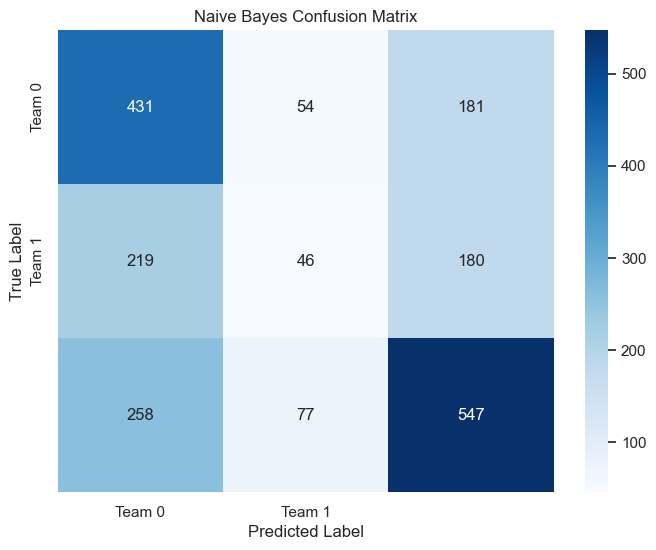

--------------
ComplementNB Accuracy: 0.5168088309081786
ComplementNB Precision: 0.4599563547744831
ComplementNB Recall: 0.5168088309081786
ComplementNB F1-score: 0.4558981148796964
ComplementNB Confusion Matrix:
[[481   1 184]
 [264   1 180]
 [331   3 548]]
ComplementNB Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.72      0.55       666
         1.0       0.20      0.00      0.00       445
         3.0       0.60      0.62      0.61       882

    accuracy                           0.52      1993
   macro avg       0.42      0.45      0.39      1993
weighted avg       0.46      0.52      0.46      1993



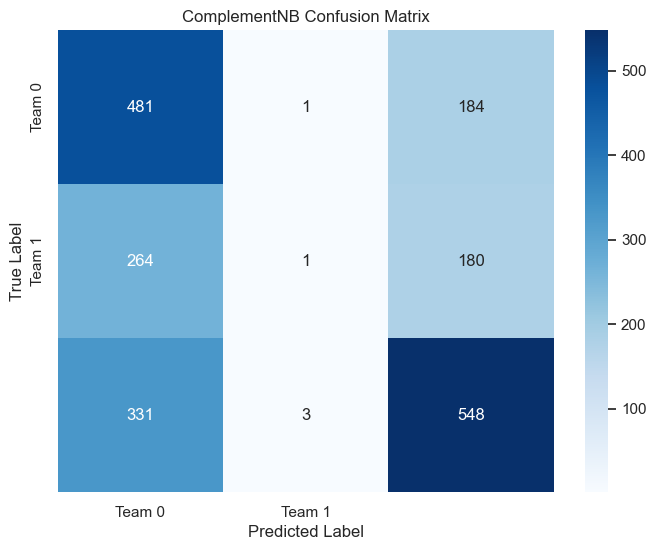

--------------
MultinomialNB Accuracy: 0.5163070747616658
MultinomialNB Precision: 0.45003294638927416
MultinomialNB Recall: 0.5163070747616658
MultinomialNB F1-score: 0.4641410531708021
MultinomialNB Confusion Matrix:
[[428  20 218]
 [230   9 206]
 [265  25 592]]
MultinomialNB Classification Report:
              precision    recall  f1-score   support

         0.0       0.46      0.64      0.54       666
         1.0       0.17      0.02      0.04       445
         3.0       0.58      0.67      0.62       882

    accuracy                           0.52      1993
   macro avg       0.40      0.44      0.40      1993
weighted avg       0.45      0.52      0.46      1993



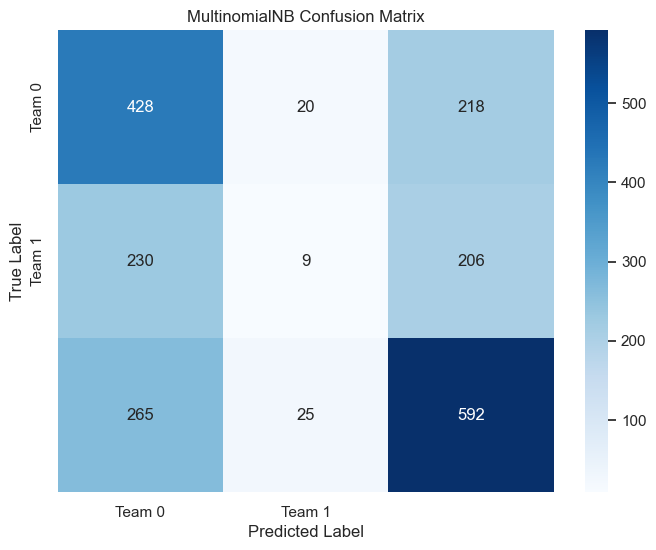

--------------
Logistic Regression Accuracy: 0.5293527345709985
Logistic Regression Precision: 0.46645058910739845
Logistic Regression Recall: 0.5293527345709985
Logistic Regression F1-score: 0.4624179448680507
Logistic Regression Confusion Matrix:
[[362   3 301]
 [162   3 280]
 [186   6 690]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.54      0.53       666
         1.0       0.25      0.01      0.01       445
         3.0       0.54      0.78      0.64       882

    accuracy                           0.53      1993
   macro avg       0.43      0.44      0.39      1993
weighted avg       0.47      0.53      0.46      1993



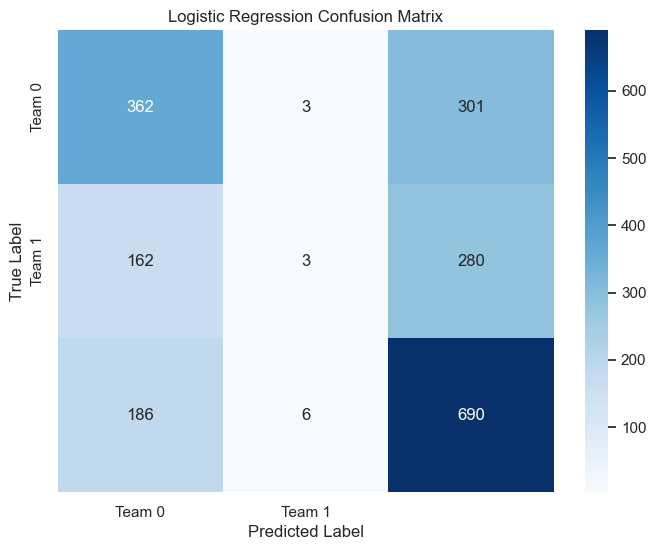

--------------


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


for name in names:
    # Calculate accuracy for each model
    accuracy = accuracy_score(test_data['team_1_result'], test_data[name + '_team_1_result'])
    print(f"{name} Accuracy: {accuracy}")

    # Calculate precision, recall, and F1-score with appropriate averaging for multiclass
    precision = precision_score(test_data['team_1_result'], test_data[name + '_team_1_result'], average='weighted')
    recall = recall_score(test_data['team_1_result'], test_data[name + '_team_1_result'], average='weighted')
    f1 = f1_score(test_data['team_1_result'], test_data[name + '_team_1_result'], average='weighted')
    print(f"{name} Precision: {precision}")
    print(f"{name} Recall: {recall}")
    print(f"{name} F1-score: {f1}")

    # Generate confusion matrix and classification report
    cm = confusion_matrix(test_data['team_1_result'], test_data[name + '_team_1_result'])
    print(f"{name} Confusion Matrix:\n{cm}")

    class_report = classification_report(test_data['team_1_result'], test_data[name + '_team_1_result'])
    print(f"{name} Classification Report:\n{class_report}")

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Team 0', 'Team 1'], yticklabels=['Team 0', 'Team 1'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    print("--------------")


## Conclusion:

We can say that the team will win given the features we chose.

The model may have limited ability to distinguish between the classes, and its predictions might not be very informative.

The model has a moderate precision,so it is somewhat selective in predicting positive instances

The recall is also moderate, indicating that the model captures a reasonable proportion of actual positive instances.

Store predictions in a CSV file for further analysis.

---
